<a href="https://colab.research.google.com/github/SarvjeetAnand/CIP-Data-Science-Internship/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price classification using Machine Learning**

The Mobile Price Classification dataset contains various features of mobile phones such as battery power, camera quality, memory, etc. and their corresponding price range category. The goal of this dataset is to predict the price range category of a mobile phone based on its features.

This is a multi-class classification problem with four price range categories: 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost). The dataset contains 2,000 observations and 21 features. The features are as follows:

id: ID of the mobile phone

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has Bluetooth or not

clock_speed: Speed at which microprocessor executes instructions

dual_sim: Has dual SIM support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of the processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: Time that a single battery charge will last when you are on a call measured in hours

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

This dataset can be used to train machine learning models to accurately predict the price range category of a mobile phone based on its features, which can be useful for mobile phone manufacturers and retailers to better understand their target audience and make data-driven decisions about their products.

## importing libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
mb_df=pd.read_csv("/content/train.csv")
mb_df_test=pd.read_csv("/content/test.csv")

In [3]:
mb_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Preprocessing

In [4]:
mb_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
mb_df.shape

(2000, 21)

In [6]:
mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
mb_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
mb_df.duplicated().any()

False

## Exploratory Data Analysis(EDA)

### Correlations between features in our tarining data.

<Axes: >

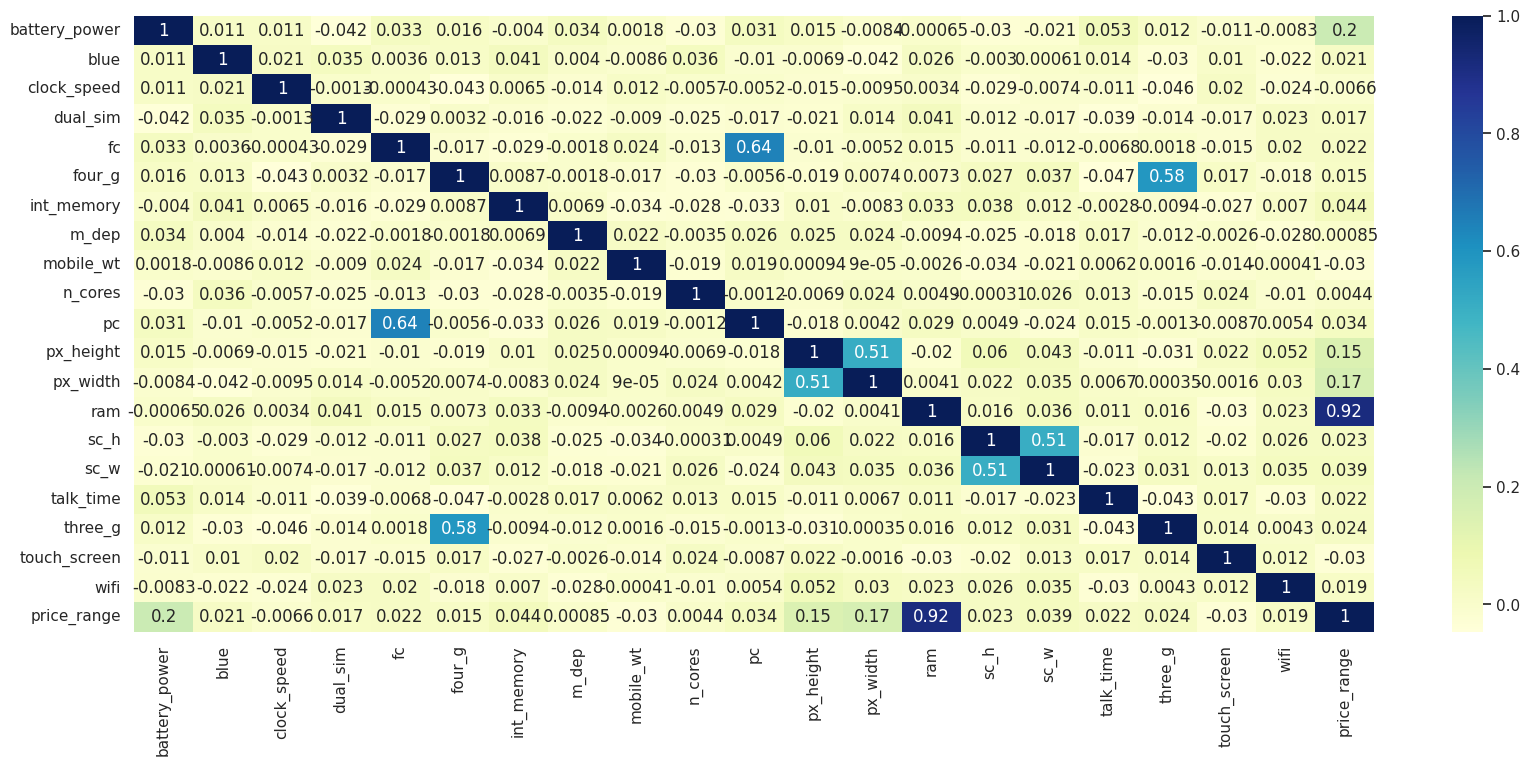

In [9]:
corr_matrix = mb_df.corr()
sns.set (rc = {'figure.figsize':(20, 8)})
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

### Compare the distribution of features for different target variable values

<Axes: xlabel='price_range', ylabel='count'>

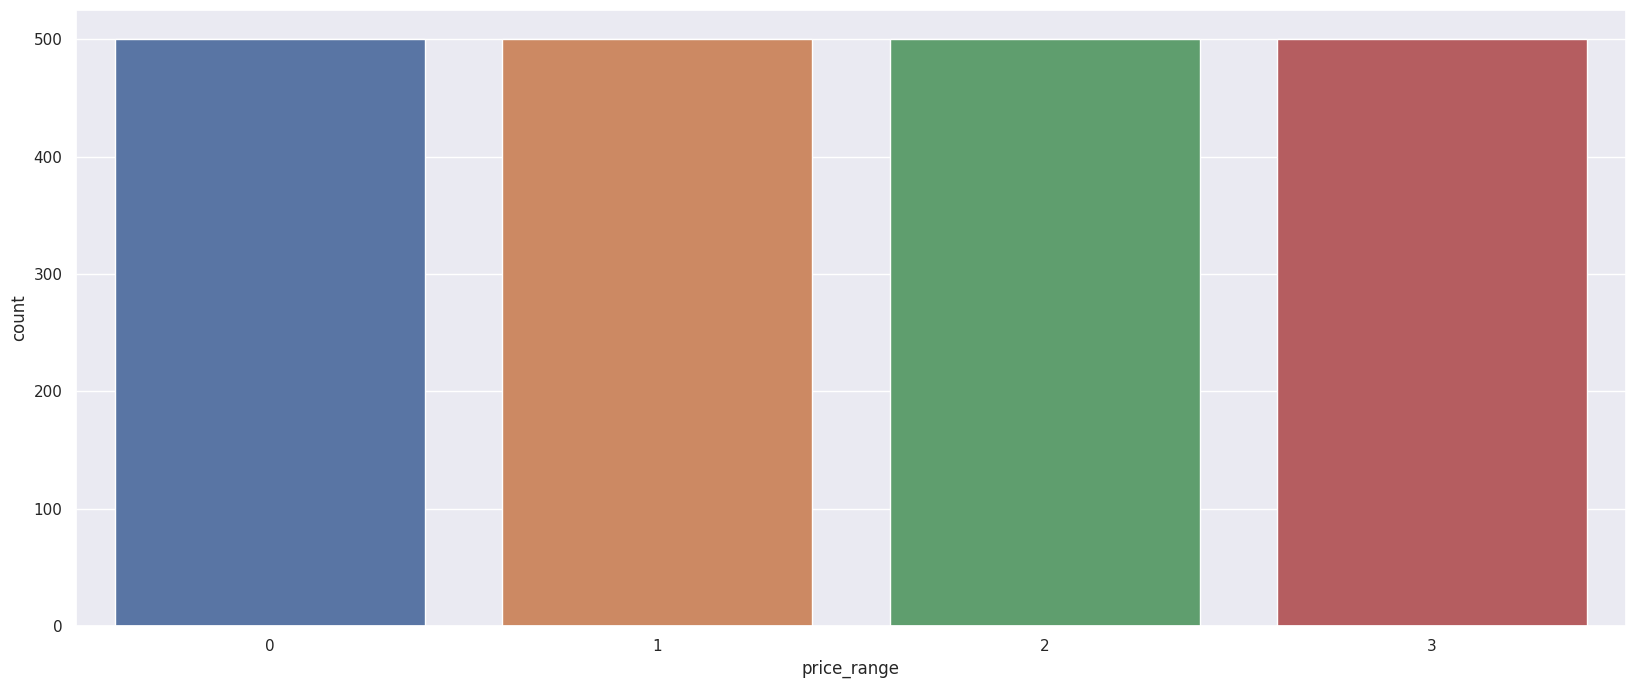

In [10]:
sns.countplot(x='price_range', data=mb_df)

<Axes: xlabel='price_range', ylabel='battery_power'>

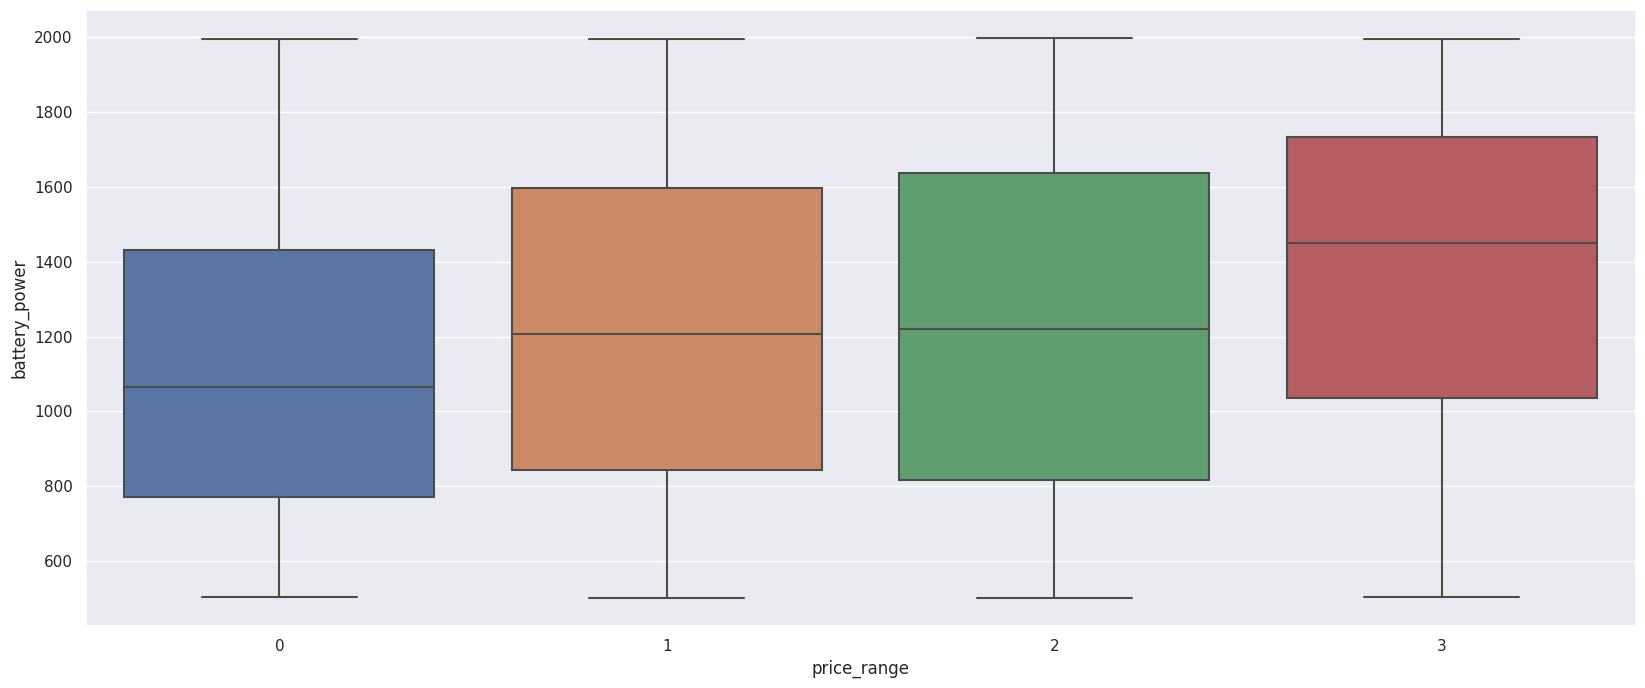

In [11]:
sns.boxplot(x='price_range', y='battery_power', data=mb_df)

<Axes: xlabel='price_range', ylabel='ram'>

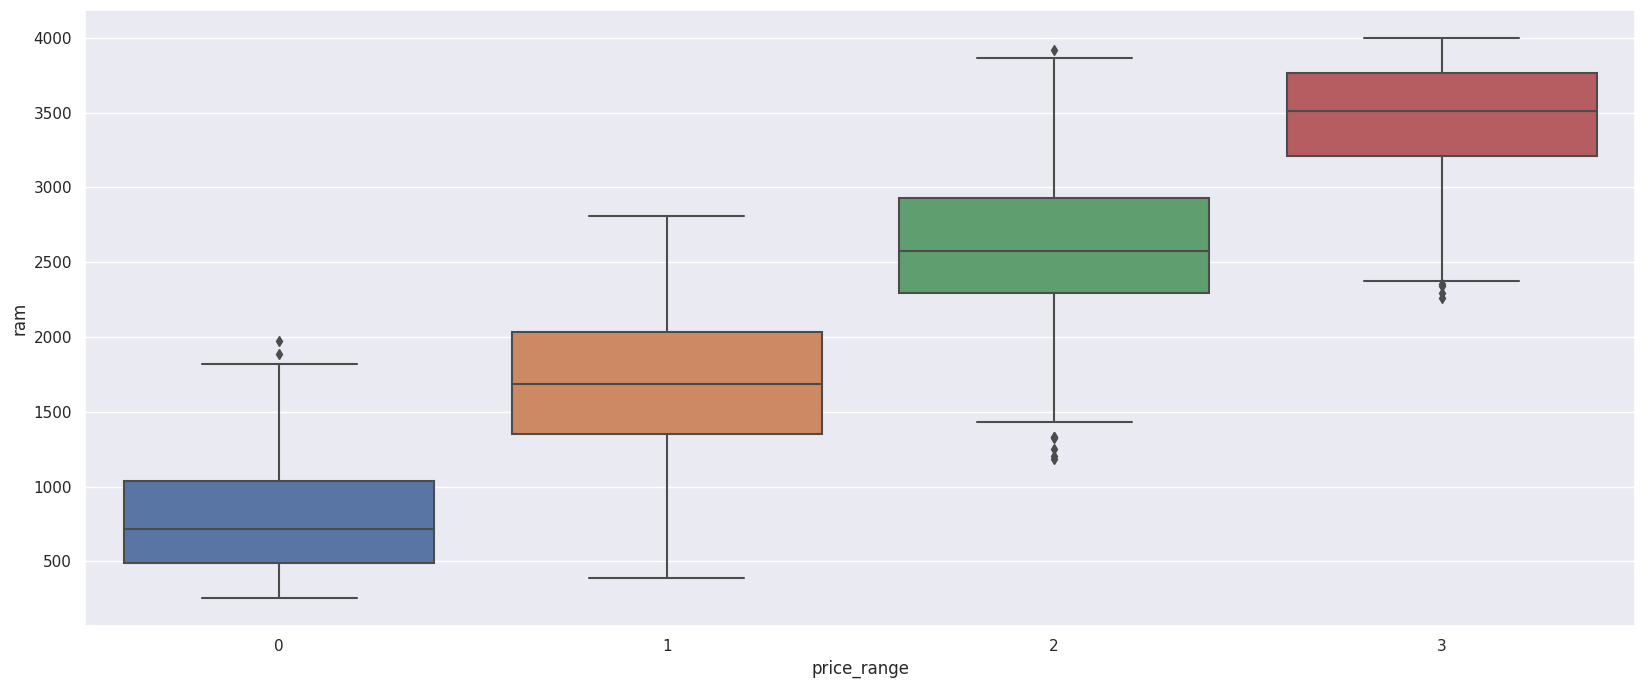

In [12]:
sns.boxplot(x='price_range', y='ram', data=mb_df)

### Number of cores of processor.

In [13]:
mb_df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

<Axes: xlabel='n_cores', ylabel='price_range'>

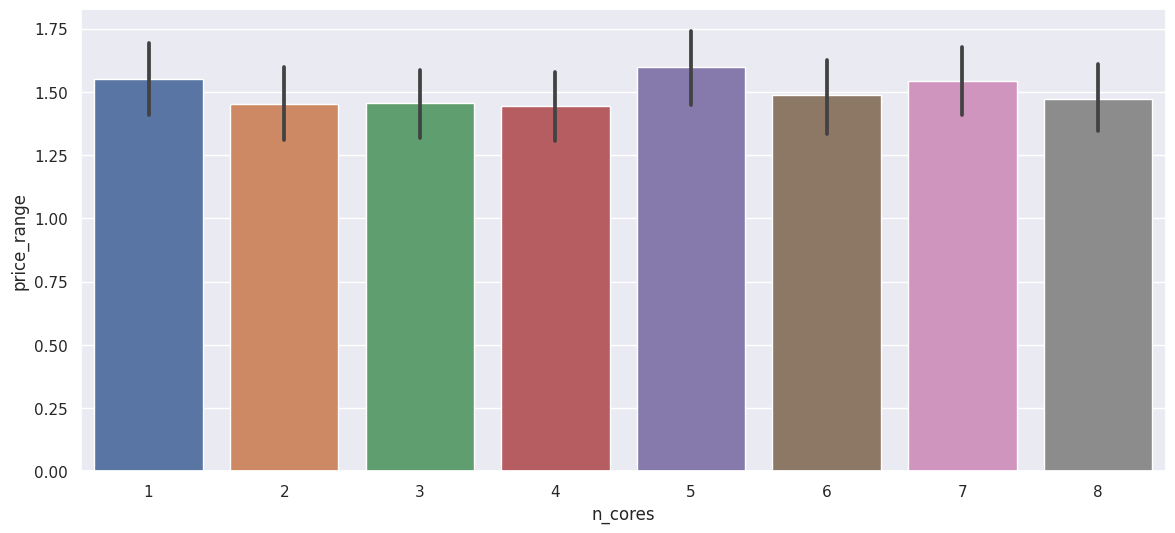

In [14]:
plt.figure(figsize=(14,6))
sns.barplot(x = "n_cores",  y = "price_range", data = mb_df)

### Which Mobile Phone have Dual Sim.

In [15]:
mb_df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

Text(0.5, 1.0, 'Dual_Sim Or Not')

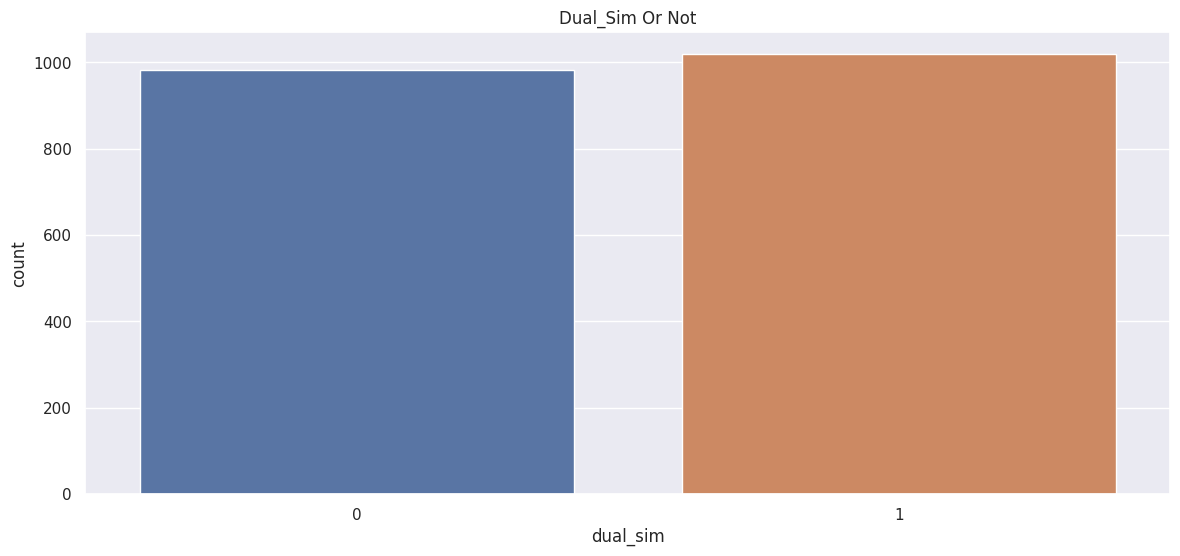

In [16]:
plt.figure(figsize=(14,6))
sns.countplot(x='dual_sim', data=mb_df)
plt.title('Dual_Sim Or Not')

### Which Mobiles Phone have 4G and 3G.

Text(0.5, 1.0, 'Three_G Phone')

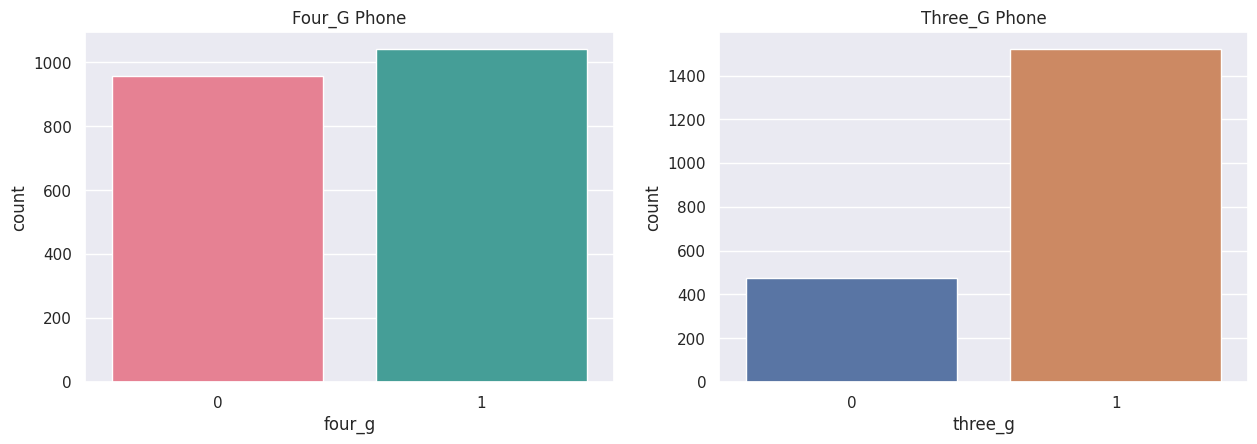

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='four_g',  data=mb_df, palette='husl')
plt.title('Four_G Phone')
plt.subplot(2,2,2)
sns.countplot(x='three_g',  data=mb_df)
plt.title('Three_G Phone')

### Price Range vs all numerical Values.

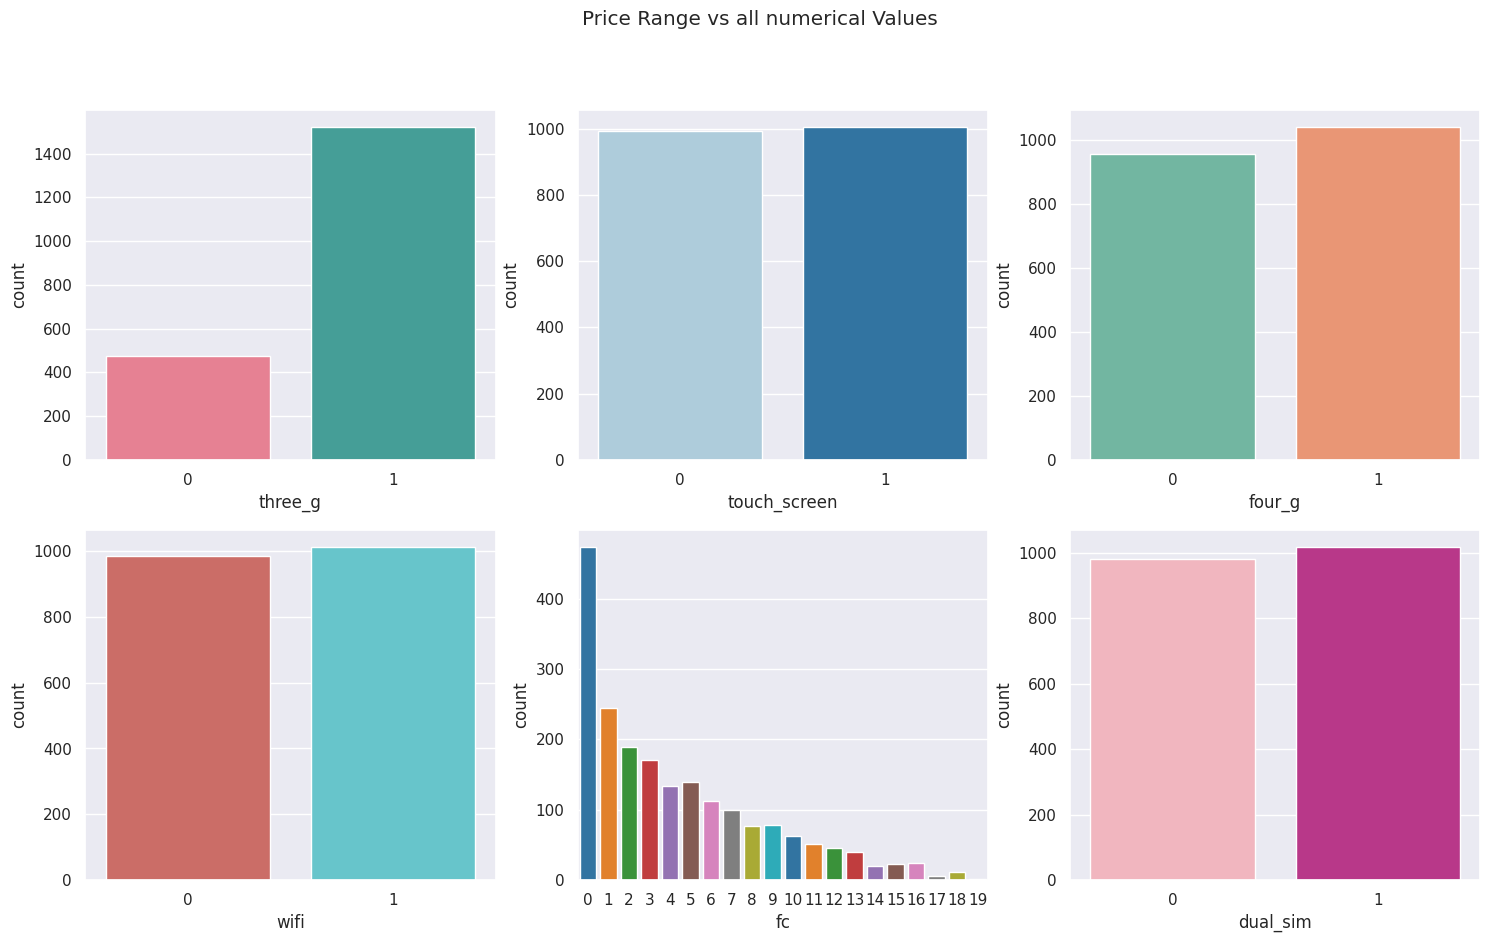

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical Values')
sns.countplot(ax=axes[0, 0], data=mb_df, x='three_g',palette='husl')
sns.countplot(ax=axes[0, 1], data=mb_df, x='touch_screen',palette='Paired')
sns.countplot(ax=axes[0, 2], data=mb_df, x='four_g',palette='Set2')
sns.countplot(ax=axes[1, 0], data=mb_df, x='wifi',palette='hls')
sns.countplot(ax=axes[1,1],data = mb_df, x ='fc' ,palette='tab10')
sns.countplot(ax=axes[1,2],data = mb_df, x ='dual_sim',palette='RdPu' )
plt.show()

# **Feature Selection**

### Split features and target variable.

In [19]:
X = mb_df.iloc[:, :-1]

In [20]:
y = mb_df.iloc[:, -1]

## Apply SelectKBest Algorithm.

### Select the top K features using chi-squared test.

In [21]:
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

In [22]:
dfscores = pd.DataFrame(fit.scores_)

In [23]:
dfcolumns = pd.DataFrame(X.columns)

In [24]:
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']

In [25]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


### Take top 10 features variables.

In [26]:
top_features = feature_scores.nlargest(10, 'Score')
top_features

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [27]:
X = X[top_features['Feature']]
X.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8


# **Appling Different Different Machine Learning Models for Training.**

### Scale the features.

In [28]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Train a Random Forest Classifier.**

In [30]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Predict the target variable for the test set.

In [31]:
y_pred = rfc.predict(X_test)

### Evaluate the model.

In [32]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 93   2   0   0]
 [  3  82   7   0]
 [  0   9  80  10]
 [  0   0   6 108]]


In [33]:
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy1}")

Accuracy score: 0.9075


In [34]:
random_forest_cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(random_forest_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.88      0.89      0.89        92
           2       0.86      0.81      0.83        99
           3       0.92      0.95      0.93       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## **Logistic Regression.**

In [35]:
lrc= LogisticRegression(random_state = 0)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predict the target variable for the test set.

In [36]:
y_pred = lrc.predict(X_test)

In [37]:
print(y_pred)

[3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 2 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 0 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 2 0 1 3 0 2 1 1 2 1 1 0 2 0 1 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 2 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 2 0]


### Evaluate the model.

In [38]:
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy2}")

Accuracy score: 0.97


In [39]:
Logistic_Regression_cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(Logistic_Regression_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.94      0.98      0.96        92
           2       0.98      0.94      0.96        99
           3       0.98      0.98      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## **Support Vector(SVM)**

In [40]:
svmc= SVC(kernel = 'linear', random_state = 0)
svmc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predict the target variable for the test set.

In [41]:
y_pred = svmc.predict(X_test)

### Evaluate the model.

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 95   0   0   0]
 [  2  90   0   0]
 [  0   5  92   2]
 [  0   0   2 112]]


In [43]:
accuracy3= accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy3}")

Accuracy score: 0.9725


In [44]:
svm_cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(svm_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       0.95      0.98      0.96        92
           2       0.98      0.93      0.95        99
           3       0.98      0.98      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## **Training the K-NN model on the Training set.**

In [45]:
knncr = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knncr.fit(X_train, y_train)

KNeighborsClassifier()

### Predict the target variable for the test set.

In [46]:
y_pred = knncr.predict(X_test)

### Evaluate the model.

In [47]:
accuracy4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy4}")

Accuracy score: 0.68


In [48]:
knn_cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(knn_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        95
           1       0.52      0.63      0.57        92
           2       0.58      0.63      0.60        99
           3       0.94      0.67      0.78       114

    accuracy                           0.68       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.71      0.68      0.69       400



## **Training the Naive Bayes on the Training set**

In [49]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

### Predict the target variable for the test set.

In [50]:
y_pred = nbc.predict(X_test)

### Evaluate the model.

In [51]:
accuracy5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {accuracy5}")

Accuracy score : 0.8175


In [52]:
nb_cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(nb_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.92        95
           1       0.74      0.74      0.74        92
           2       0.70      0.70      0.70        99
           3       0.87      0.91      0.89       114

    accuracy                           0.82       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



## **Training Decision Tree Classification on Train set**

In [53]:
dcc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dcc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predict the target variable for the test set.

In [54]:
y_pred = dcc.predict(X_test)

### Evaluate the model.

In [55]:
accuracy6= accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy6}")

Accuracy score: 0.8775


In [56]:
dc_cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(dc_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       0.82      0.85      0.83        92
           2       0.82      0.83      0.82        99
           3       0.94      0.90      0.92       114

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



# **Create visualization for all model with their Accuracy.**

In [57]:
list_accuracy=[]
list_Model=[]
list_accuracy.append(accuracy1)
list_Model.append("Random Forest")
list_accuracy.append(accuracy2)
list_Model.append("Logistic Regression")
list_accuracy.append(accuracy3)
list_Model.append("SVM")
list_accuracy.append(accuracy4)
list_Model.append("KNN")
list_accuracy.append(accuracy5)
list_Model.append("Naive Bayes")
list_accuracy.append(accuracy6)
list_Model.append("Decision Tree Classification")


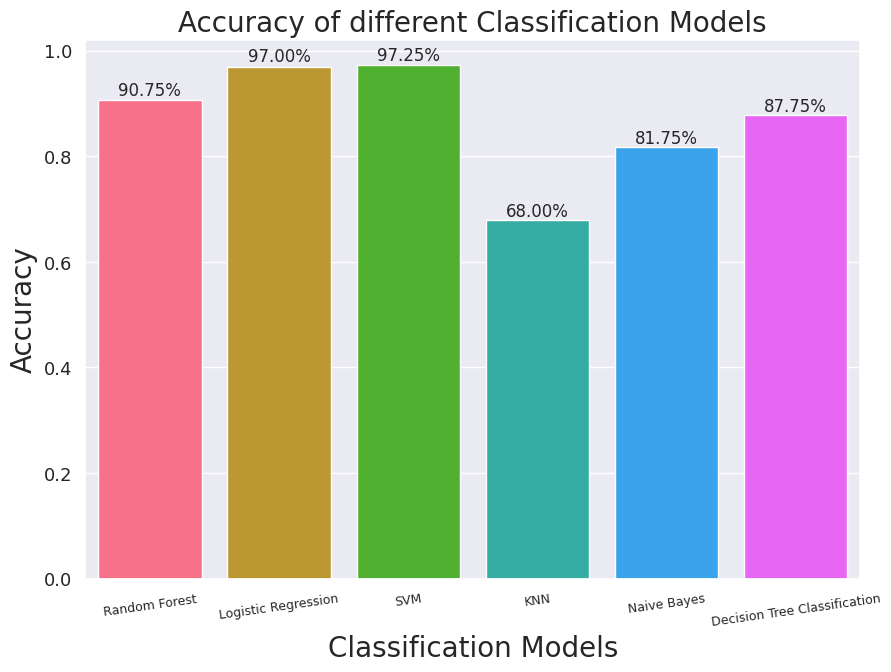

In [58]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
ax = sns.barplot(x=list_Model, y=list_accuracy, palette = "husl", saturation =2)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 9, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center', fontsize = 'medium')
plt.show()